In [2]:
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import sys

def get_coords(id, L):
    return (id % L, id // L)

In [20]:
filename = "/projects/p32813/blume_capel/data/tri-8-26/spin/24"
L = 24
cmap = colors.ListedColormap(['#feaead', '#2f2d35', '#9eaffe'])

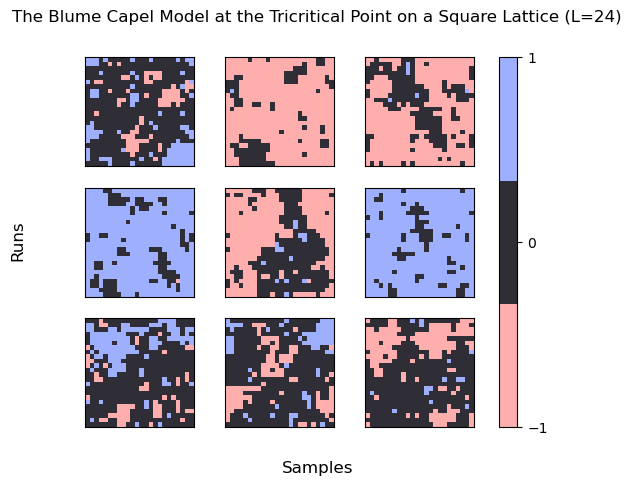

In [21]:
runs = 3
samples = 3
f, axs = plt.subplots(runs, samples)

for i in range(runs):
    for j in range(samples):
        lattice = np.zeros((L,L))
        file = open(filename + f"/{i}/{j}.txt")
        
        for line in file.readlines():
            val = 1 if (line[0] == "+") else -1
            cluster = [int(site) for site in line.split(" ")[1:] if site != "\n"]
            if (len(cluster) == 0):
                continue
                
            sites = list()
            prev = cluster[0]
            sites.append(prev)
        
            for gap in cluster[1:]:
                curr = prev + gap
                sites.append(curr)
                prev = curr
        
            for site in sites:
                lattice[get_coords(site, L)] = val
        
        im = axs[i,j].imshow(lattice, cmap=cmap, vmin=-1, vmax=1)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        
f.supxlabel("Samples")
f.supylabel("Runs")
f.suptitle(f"The Blume Capel Model at the Tricritical Point on a Square Lattice (L={L})")
plt.colorbar(im, ax=axs.ravel().tolist(), ticks=[-1, 0, 1])
plt.show()

In [16]:
filename = "/projects/p32813/blume_capel/data/tri-8-26/burn/16_burn.txt"
L = 16
cmap = colors.ListedColormap(['#feaead', '#2f2d35', '#9eaffe'])

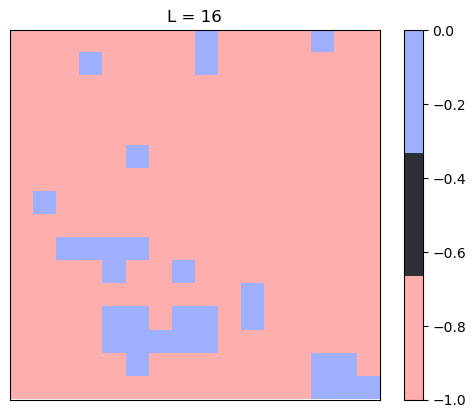

In [17]:
lattice = np.zeros((L,L))
file = open(filename)
for line in file.readlines():
    val = 0
    if (line[0] == "+"):
        val = 1
    elif (line[0] == '-'):
        val = -1
    else:
        print(line)
        val = 100
    cluster = [int(site) for site in line.split(" ")[1:] if site != "\n"]
    if (len(cluster) == 0):
        continue

    sites = list()
    prev = cluster[0]
    sites.append(prev)

    for gap in cluster[1:]:
        curr = prev + gap
        sites.append(curr)
        prev = curr

    for site in sites:
        lattice[get_coords(site, L)] = val
        
plt.imshow(lattice, cmap=cmap)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title(f"L = {L}")
plt.show()